# Importing the Dataset

In [1]:
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')    

Matplotlib is building the font cache; this may take a moment.


In [7]:
df=pd.read_csv('Temparature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Checking Null Values


In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There is so many missing values in the datasets.we shall handle this.

In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# DataFrame Description

This dataset contains of various features under which temparature is measured.
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model .
The input data is largely composed of the LDAPS model.We are going to predict the  two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



# Exploratory Data Analysis

# Checking the datatypes of the columns

In [10]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Statistical Analysis

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


looking at the Statistical Analysis the mean value,median value the datasets is  normally distributed.

# Correlation

In [12]:
dfcor=df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


<AxesSubplot:>

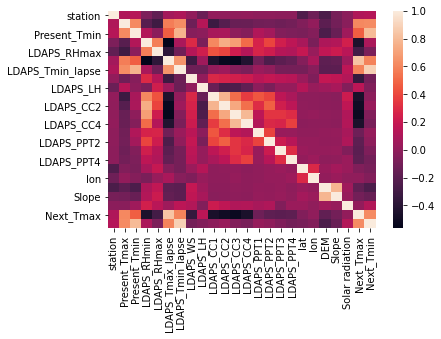

In [8]:
sns.heatmap(dfcor)

<AxesSubplot:>

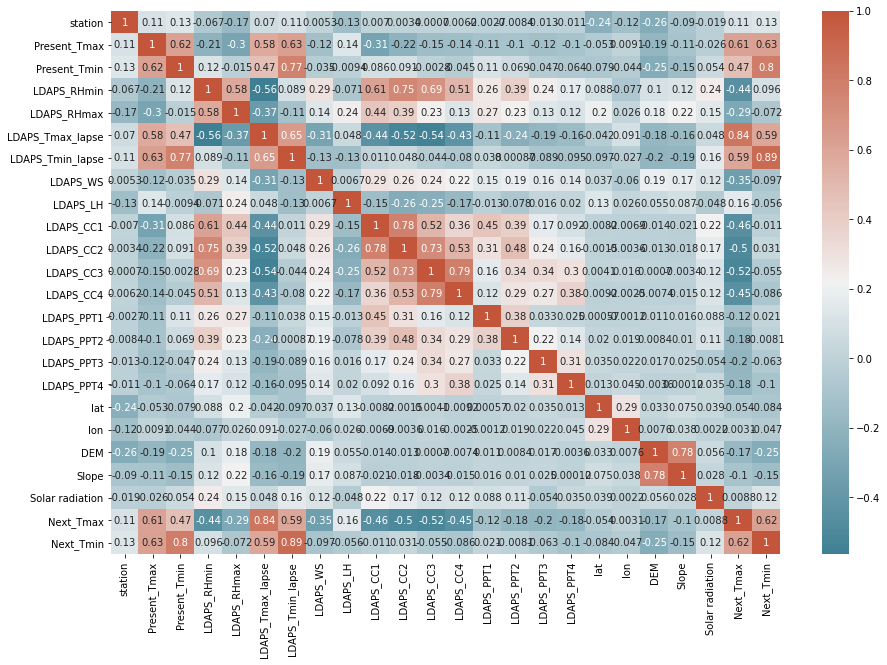

In [13]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Replacing Missing Values

In [18]:
df['Next_Tmax'].fillna(value=df['Next_Tmax'].mean(), inplace=True)

In [19]:
df['Next_Tmin'].fillna(value=df['Next_Tmin'].mean(), inplace=True)

In [20]:
df['Present_Tmax'].fillna(value=df['Present_Tmax'].mean(), inplace=True)

In [21]:
df['Present_Tmin'].fillna(value=df['Present_Tmin'].mean(), inplace=True)

In [22]:
df['LDAPS_RHmin'].fillna(value=df['LDAPS_RHmin'].mean(), inplace=True)

In [23]:
df['LDAPS_RHmax'].fillna(value=df['LDAPS_RHmax'].mean(), inplace=True)

In [24]:
df['LDAPS_Tmax_lapse'].fillna(value=df['LDAPS_Tmax_lapse'].mean(), inplace=True)

In [25]:
df['LDAPS_Tmin_lapse'].fillna(value=df['LDAPS_Tmin_lapse'].mean(), inplace=True)

In [26]:
df['LDAPS_WS'].fillna(value=df['LDAPS_WS'].mean(), inplace=True)

In [27]:
df['LDAPS_LH'].fillna(value=df['LDAPS_LH'].mean(), inplace=True)

In [28]:
df['LDAPS_CC1'].fillna(value=df['LDAPS_CC1'].mean(), inplace=True)

In [29]:
df['LDAPS_CC2'].fillna(value=df['LDAPS_CC2'].mean(), inplace=True)

In [30]:
df['LDAPS_CC3'].fillna(value=df['LDAPS_CC3'].mean(), inplace=True)

In [31]:
df['LDAPS_CC4'].fillna(value=df['LDAPS_CC4'].mean(), inplace=True)

In [32]:
df['LDAPS_PPT1'].fillna(value=df['LDAPS_PPT1'].mean(), inplace=True)

In [33]:
df['LDAPS_PPT2'].fillna(value=df['LDAPS_PPT2'].mean(), inplace=True)

In [34]:
df['LDAPS_PPT2'].fillna(value=df['LDAPS_PPT2'].mean(), inplace=True)

In [35]:
df['LDAPS_PPT3'].fillna(value=df['LDAPS_PPT3'].mean(), inplace=True)

In [36]:
df['LDAPS_PPT4'].fillna(value=df['LDAPS_PPT4'].mean(), inplace=True)

In [37]:
df['station'].fillna(value=df['station'].mean(), inplace=True)

In [38]:
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [39]:
df_visualization_nominal=df[['station','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Slope','Next_Tmax','Next_Tmin']].copy()

In [40]:
df_visualization_nominal.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Slope',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Visualization of the Data

13.0    312
15.0    310
21.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
12.0    310
9.0     310
24.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
14.0    310
Name: station, dtype: int64


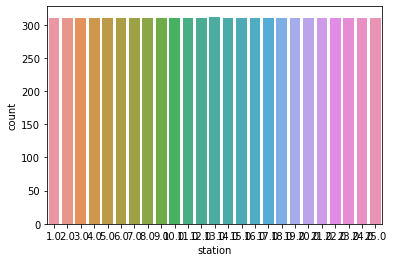

In [41]:
 import seaborn as sns
 ax = sns.countplot(x="station",data=df_visualization_nominal)
print(df_visualization_nominal["station"].value_counts())   

In [42]:
df_visualization_nominal=df[["Present_Tmin","Present_Tmax"]].copy()

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

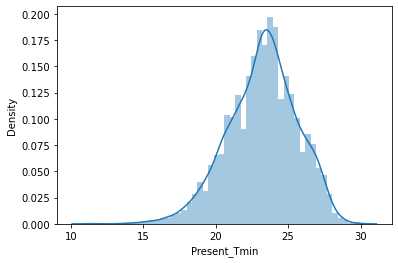

In [43]:
import seaborn as sns
sns.distplot(df_visualization_nominal["Present_Tmin"],kde=True)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

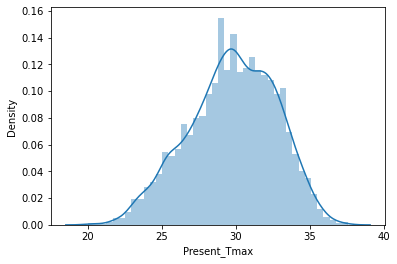

In [44]:
sns.distplot(df_visualization_nominal["Present_Tmax"],kde=True)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

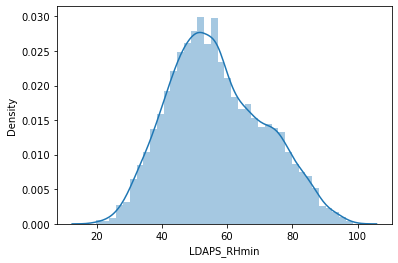

In [45]:
df_visualization_nominal=df[["LDAPS_RHmin","LDAPS_RHmax"]].copy()
sns.distplot(df_visualization_nominal["LDAPS_RHmin"],kde=True)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

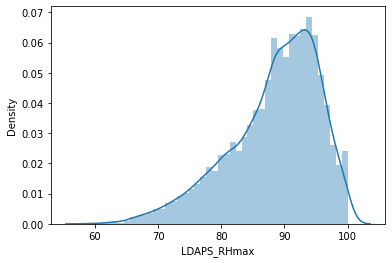

In [46]:
sns.distplot(df_visualization_nominal["LDAPS_RHmax"],kde=True)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

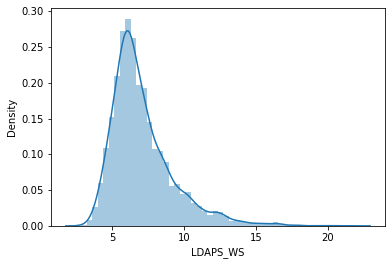

In [47]:
df_visualization_nominal=df[["LDAPS_WS","LDAPS_LH"]].copy()
sns.distplot(df_visualization_nominal["LDAPS_WS"],kde=True)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

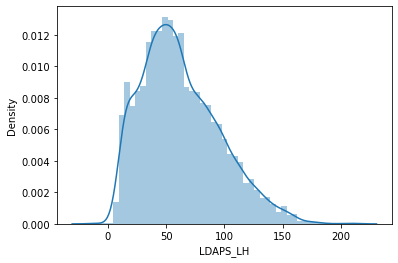

In [48]:
sns.distplot(df_visualization_nominal["LDAPS_LH"],kde=True)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

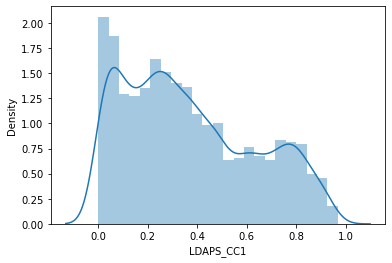

In [49]:
df_visualization_nominal=df[["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4"]].copy()
sns.distplot(df_visualization_nominal["LDAPS_CC1"],kde=True)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

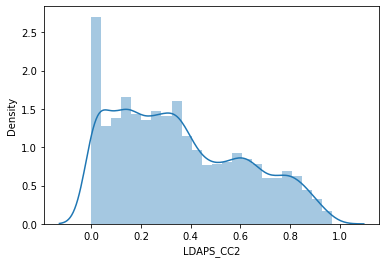

In [50]:
sns.distplot(df_visualization_nominal["LDAPS_CC2"],kde=True)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

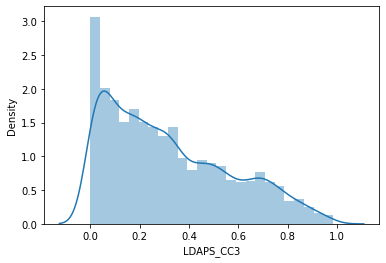

In [51]:
sns.distplot(df_visualization_nominal["LDAPS_CC3"],kde=True)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

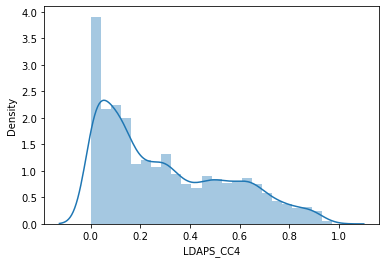

In [52]:
sns.distplot(df_visualization_nominal["LDAPS_CC4"],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

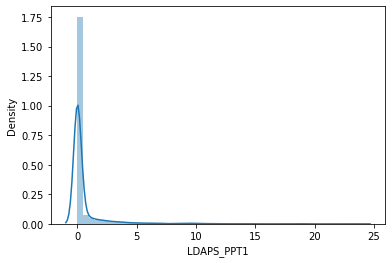

In [53]:
df_visualization_nominal=df[["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]].copy()
sns.distplot(df_visualization_nominal["LDAPS_PPT1"],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

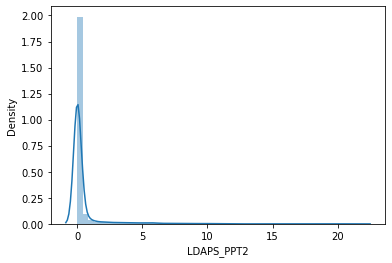

In [54]:
sns.distplot(df_visualization_nominal["LDAPS_PPT2"],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

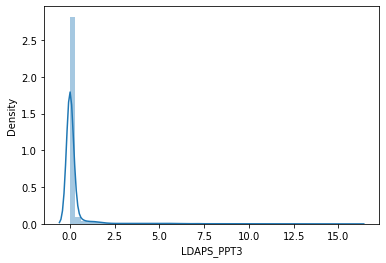

In [55]:
sns.distplot(df_visualization_nominal["LDAPS_PPT3"],kde=True)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

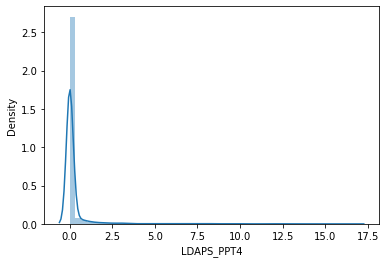

In [56]:
sns.distplot(df_visualization_nominal["LDAPS_PPT4"],kde=True)

<AxesSubplot:xlabel='Slope', ylabel='Density'>

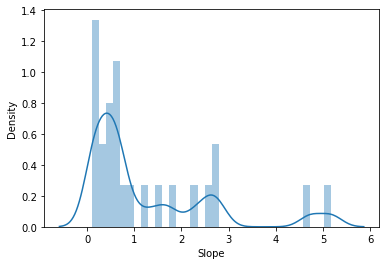

In [57]:
df_visualization_nominal=df[["Slope","Solar radiation","Next_Tmax","Next_Tmin"]].copy()
sns.distplot(df_visualization_nominal["Slope"],kde=True)

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

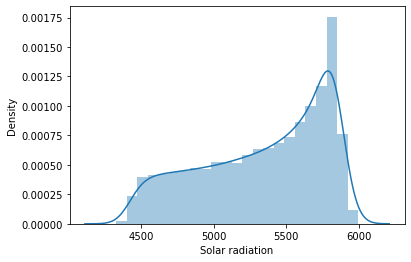

In [58]:
sns.distplot(df_visualization_nominal["Solar radiation"],kde=True)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

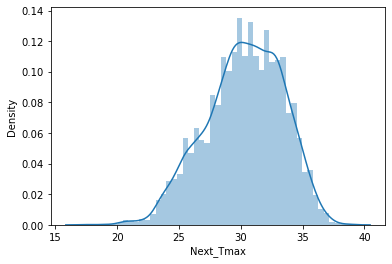

In [59]:
sns.distplot(df_visualization_nominal["Next_Tmax"],kde=True)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

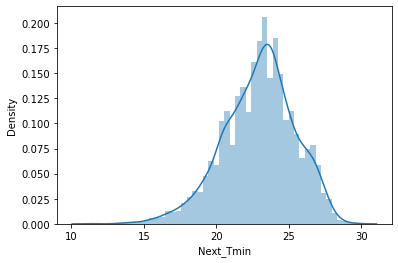

In [60]:
sns.distplot(df_visualization_nominal["Next_Tmin"],kde=True)

In [61]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

There are skewness in few columns ,we shall handle this.

# Extracting day and month from Date column

In [62]:
df['Date_day']=pd.to_datetime(df.Date,format='%d-%m-%Y').dt.day

In [63]:
df['Date_month']=pd.to_datetime(df.Date,format='%d-%m-%Y').dt.month

In [64]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0
7750,13.0,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN


In [88]:
df.drop(['Date'],axis=1,inplace=True)

In [65]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0
7750,13.0,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN


# Replacing null values in Date day and Date month.

In [89]:
df['Date_day'].fillna(value=df['Date_day'].mean(), inplace=True)

In [90]:
df['Date_month'].fillna(value=df['Date_month'].mean(), inplace=True)

df.isnull().sum()

Now there are no null values in the dataset and the Date column is dropped .

In [92]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.000000,6.000000
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.000000,6.000000
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.000000,6.000000
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.000000,6.000000
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.000000,8.000000
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.000000,8.000000
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.000000,8.000000
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,15.983871,7.467742


In [93]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Date_day           -0.008926
Date_month         -0.195889
dtype: float64

In [94]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.000000,6.000000
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.000000,6.000000
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.000000,6.000000
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.000000,6.000000
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.000000,8.000000
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.000000,8.000000
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.000000,8.000000
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,15.983871,7.467742


In [95]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Date_day            float64
Date_month          float64
dtype: object

# Outliers Removal


<AxesSubplot:>

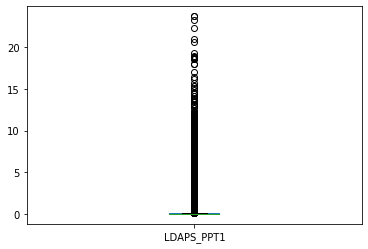

In [96]:
df['LDAPS_PPT1'].plot.box()

<AxesSubplot:>

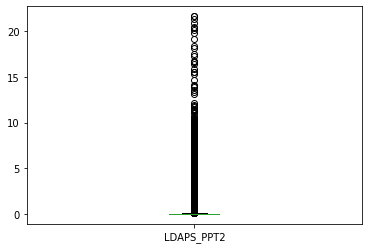

In [97]:
df['LDAPS_PPT2'].plot.box()

<AxesSubplot:>

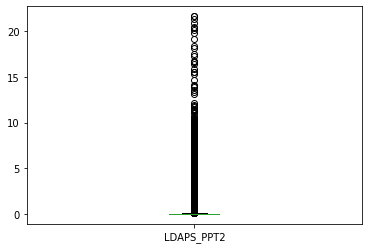

In [98]:
df['LDAPS_PPT2'].plot.box()

<AxesSubplot:>

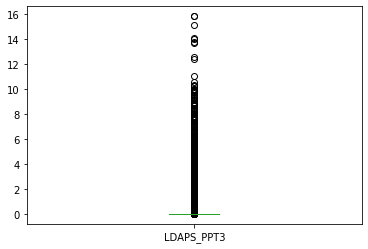

In [99]:
df['LDAPS_PPT3'].plot.box()

<AxesSubplot:>

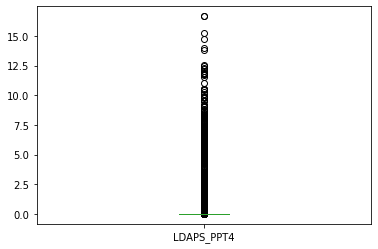

In [100]:
df['LDAPS_PPT4'].plot.box()

<AxesSubplot:>

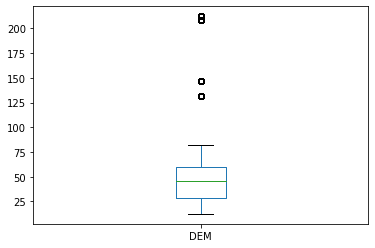

In [101]:
df['DEM'].plot.box()

<AxesSubplot:>

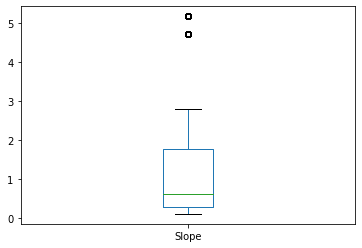

In [102]:
df['Slope'].plot.box()

<AxesSubplot:>

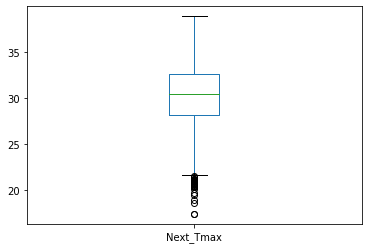

In [103]:
df['Next_Tmax'].plot.box()

<AxesSubplot:>

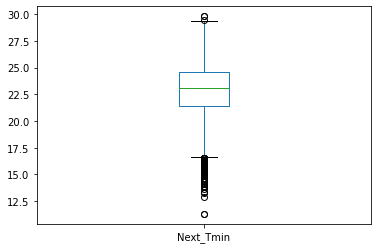

In [104]:
df['Next_Tmin'].plot.box()

In [105]:
df.shape

(7752, 26)

In [106]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Date_day            float64
Date_month          float64
dtype: object

In [107]:
from  scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [108]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0


In [109]:
df_new_z.shape

(6894, 26)

In [110]:
#Percentage loss of Data

In [111]:
Data_loss=((7752-6894)/7043)*100

In [112]:
Data_loss

12.18230867528042

In [115]:
features1=df.drop("Next_Tmax",axis=1)
features2=df.drop("Next_Tmin",axis=1)


In [119]:
print(features1,features2)

      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750     13.0          20.0          11.3    19.794666    58.936283   
7751     13.0          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.2

In [120]:
target1=df["Next_Tmax"]

In [121]:
target2=df["Next_Tmin"]

# Scaling the data using Min-Max Scaler:

In [122]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import  train_test_split
import warnings
warnings.filterwarnings('ignore')

In [123]:
for  i in range(0,100):
    features1_train,features1_test,target1_train,target1_test=train_test_split(features1,target1,test_size=0.2,random_state=i)
    lr.fit(features1_train,target1_train)
    pred_train=lr.predict(features1_train)
    pred_test=lr.predict(features1_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target1_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(target1_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.7943238556245056
At random state 0,the testing accuracy is:-0.8042258055718448


At random state 1,the training accuracy is:-0.7974919146106374
At random state 1,the testing accuracy is:-0.7908335775342373


At random state 2,the training accuracy is:-0.7979390530110825
At random state 2,the testing accuracy is:-0.7900310739554268


At random state 3,the training accuracy is:-0.7958459984018935
At random state 3,the testing accuracy is:-0.7980195080733032


At random state 4,the training accuracy is:-0.7924701323050396
At random state 4,the testing accuracy is:-0.8113238003532196


At random state 5,the training accuracy is:-0.7953493105317161
At random state 5,the testing accuracy is:-0.7999939469022411


At random state 6,the training accuracy is:-0.7962210858160614
At random state 6,the testing accuracy is:-0.7967278008526342


At random state 7,the training accuracy is:-0.7970376500882166
At random state 7,the testing accuracy is:-0.793

In [124]:
for  i in range(0,100):
    features2_train,features2_test,target2_train,target2_test=train_test_split(features2,target2,test_size=0.2,random_state=i)
    lr.fit(features2_train,target2_train)
    pred_train=lr.predict(features2_train)
    pred_test=lr.predict(features2_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target2_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(target2_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.8516701563087332
At random state 0,the testing accuracy is:-0.8455388339308713


At random state 1,the training accuracy is:-0.8507579853302376
At random state 1,the testing accuracy is:-0.8494152221476307


At random state 2,the training accuracy is:-0.8518077766348531
At random state 2,the testing accuracy is:-0.8452210390672684


At random state 3,the training accuracy is:-0.8492788048295166
At random state 3,the testing accuracy is:-0.8549931974051544


At random state 4,the training accuracy is:-0.8484002068609995
At random state 4,the testing accuracy is:-0.8588044822825343


At random state 5,the training accuracy is:-0.8510925569142378
At random state 5,the testing accuracy is:-0.8477649094402566


At random state 6,the training accuracy is:-0.8495187033397343
At random state 6,the testing accuracy is:-0.8544103775657359


At random state 7,the training accuracy is:-0.8488046097198372
At random state 7,the testing accuracy is:-0.857

In [125]:
features1_train,features1_test,target1_train,target1_test=train_test_split(features1,target1,test_size=0.2,random_state=12)

In [126]:
features2_train,features2_test,target2_train,target2_test=train_test_split(features2,target2,test_size=0.2,random_state=12)

In [127]:
lr.fit(features1_train,target1_train)

LinearRegression()

In [128]:
lr.fit(features2_train,target2_train)

LinearRegression()

In [129]:
pred_test1=lr.predict(features1_test)

In [130]:
pred_test2=lr.predict(features2_test)

In [131]:
print(r2_score(target1_test,pred_test1))

-7.466485872967276


In [132]:
print(r2_score(target2_test,pred_test2))

0.8621112865821535


# Cross-Validation of the model

In [136]:
Train_accuracy1=r2_score(target1_train,pred_train)
Test_accuracy1=r2_score(target1_test,pred_test)

In [137]:
Train_accuracy2=r2_score(target2_train,pred_train)
Test_accuracy2=r2_score(target2_test,pred_test)

In [139]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score1=cross_val_score(lr,features1,target1,cv=j)
    cv_mean1=cv_score1.mean()
    print(f"At cross fold{j} the cv score1 is {cv_mean1} and accuracy score for training is{Train_accuracy1} and accuracy for the testing is 0.86")
    print("/n") 

At cross fold2 the cv score1 is 0.7230591153074745 and accuracy score for training is-6.2503385804122304 and accuracy for the testing is 0.86
/n
At cross fold3 the cv score1 is 0.7405258503102986 and accuracy score for training is-6.2503385804122304 and accuracy for the testing is 0.86
/n
At cross fold4 the cv score1 is 0.724676272890712 and accuracy score for training is-6.2503385804122304 and accuracy for the testing is 0.86
/n
At cross fold5 the cv score1 is 0.7240798889301119 and accuracy score for training is-6.2503385804122304 and accuracy for the testing is 0.86
/n
At cross fold6 the cv score1 is 0.7296529891548221 and accuracy score for training is-6.2503385804122304 and accuracy for the testing is 0.86
/n
At cross fold7 the cv score1 is 0.7226503710671384 and accuracy score for training is-6.2503385804122304 and accuracy for the testing is 0.86
/n
At cross fold8 the cv score1 is 0.7115769684164044 and accuracy score for training is-6.2503385804122304 and accuracy for the testi

In [141]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score2=cross_val_score(lr,features2,target2,cv=j)
    cv_mean2=cv_score2.mean()
    print(f"At cross fold{j} the cv score1 is {cv_mean2} and accuracy score for training is{Train_accuracy2} and accuracy for the testing is 0.86")
    print("/n") 

At cross fold2 the cv score1 is 0.8245404696199765 and accuracy score for training is-0.8739853560347988 and accuracy for the testing is 0.86
/n
At cross fold3 the cv score1 is 0.7974914090449133 and accuracy score for training is-0.8739853560347988 and accuracy for the testing is 0.86
/n
At cross fold4 the cv score1 is 0.800492913847066 and accuracy score for training is-0.8739853560347988 and accuracy for the testing is 0.86
/n
At cross fold5 the cv score1 is 0.7939832295876302 and accuracy score for training is-0.8739853560347988 and accuracy for the testing is 0.86
/n
At cross fold6 the cv score1 is 0.7805381633240617 and accuracy score for training is-0.8739853560347988 and accuracy for the testing is 0.86
/n
At cross fold7 the cv score1 is 0.7850363981284081 and accuracy score for training is-0.8739853560347988 and accuracy for the testing is 0.86
/n
At cross fold8 the cv score1 is 0.7906330080032007 and accuracy score for training is-0.8739853560347988 and accuracy for the testi

Since the number of folds dont have such impact on the accuracy and cv_score.So cv=5 is selected.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

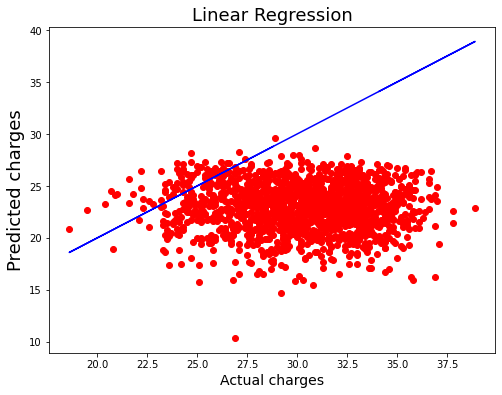

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target1_test,y=pred_test,color='r')
plt.plot(target1_test,target1_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

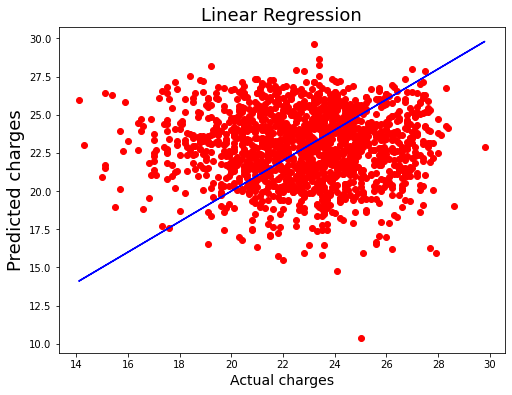

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target2_test,y=pred_test,color='r')
plt.plot(target2_test,target2_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [146]:
from sklearn.linear_model  import Lasso
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features1_train,target1_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [147]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features1_train,target1_train)
ls.score(features1_train,target1_train)
pred_ls=ls.predict(features1_test)
lss=r2_score(target1_test,pred_ls)
lss

0.7323555870295126

In [148]:
cv_score=cross_val_score(ls,features1,target1,cv=5)
cv_mean1=cv_score.mean()
cv_mean1

0.670738478652052

In [149]:
from sklearn.linear_model  import Lasso
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features2_train,target2_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [150]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features2_train,target2_train)
ls.score(features2_train,target2_train)
pred_ls=ls.predict(features2_test)
lss=r2_score(target2_test,pred_ls)
lss

0.8137548987735805

# Ensemble Technique

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features1_train,target1_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [189]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features1_train,target1_train)
rf.score(features1_train,target1_train)
pred_decision=rf.predict(features1_test)

rfs=r2_score(target1_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features1,target1,cv=5)
rfc=rfscore.mean()
print('Cross Val Score1:',rfc*100)

R2 Score: 91.7733698707776
Cross Val Score1: 70.24552494364742


In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features2_train,target2_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [153]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features2_train,target2_train)
rf.score(features2_train,target2_train)
pred_decision=rf.predict(features2_test)

rfs=r2_score(target2_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features2,target2,cv=5)
rfc=rfscore.mean()
print('Cross Val Score2:',rfc*100)

R2 Score: 91.89180738450145
Cross Val Score2: 78.7912828344657


# conclusion

In [161]:
import pickle
filename='temp_min.pkl'
pickle.dump(rf,open(filename,'wb'))

In [162]:
loaded_model=pickle.load(open('temp_min.pkl','rb'))
result1=loaded_model.score(features2_test,target2_test)
print(result1)

0.9189180738450144


In [166]:
conclusion=pd.DataFrame([loaded_model.predict(features2_test)

[:],pred_decision[:]],index=["Predicted2","Orginal"])


In [167]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
Predicted2,21.829,27.596,26.197,23.617,23.218322,24.337322,24.182,24.073,24.275,16.664,...,20.476,26.065,19.811322,23.072,23.463,17.405,21.651,24.184,22.52,23.003289
Orginal,21.829,27.596,26.197,23.617,23.218322,24.337322,24.182,24.073,24.275,16.664,...,20.476,26.065,19.811322,23.072,23.463,17.405,21.651,24.184,22.52,23.003289


In [168]:
import pickle
filename='temp_max.pkl'
pickle.dump(rf,open(filename,'wb'))

In [169]:
loaded_model=pickle.load(open('temp_min.pkl','rb'))
result2=loaded_model.score(features1_test,target1_test)
print(result2)

-6.1189753678596785


In [170]:
conclusion=pd.DataFrame([loaded_model.predict(features1_test)

[:],pred_decision[:]],index=["Predicted1","Orginal"])


In [171]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
Predicted1,21.745,25.226933,23.797255,23.163,23.218322,23.538000,23.087,23.096,23.716,16.398,...,19.615,24.530,19.709322,22.799322,23.365,17.434,21.163322,23.570,22.209,22.656967
Orginal,21.829,27.596000,26.197000,23.617,23.218322,24.337322,24.182,24.073,24.275,16.664,...,20.476,26.065,19.811322,23.072000,23.463,17.405,21.651000,24.184,22.520,23.003289


#    So there are two target variables here: 

1) Next_Tmax: Next day maximum temperature:Predicted 1

2) Next_Tmin: Next day  minimum temperature:Predicted 2